# Machine Learning for the Dementia Prediction Project  
Goal: Develop a machine learning model to predict whether a new patient will have or develop dementia based on previuos patients.  

Methodology:  
- Split data into training and testing sets  
- Test different machine learning models against each other to determine which has the highest accuracy
    - Knearest Neighbor
    - Decision Trees
    - Logistic Regression  
    - Support Vector Machine
- Choose one model then perform more rigorous analytics on that model

In [206]:
# import libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [155]:
# get the data from the database
conn = sqlite3.connect("Dementia.db")                           # connect to the database
sql_string = 'SELECT * FROM Data_Wrangled'                   
data_ML = pd.read_sql(sql_string, conn)                    # this will be the main dataframe used 

**Inputs:**  
The inputs are the features that are used to predict the outcome of the patients.  
Our inputs are Visit, M/F, Age, Educ, SES, eTIV, nWBV, and ASF  
**Output:**  
We have three output options for this dataset: Group, MMSE, and CDR.  
Group is categorical, where as MMSE and CDR and continous variables.  
For the purpose of this analysis, Group will be used as a categorical variable for classification machine learning.  
The other two outcome may be anaylzed later. 

In [156]:
# Define X and Y variables, convert these values from a pandas dataframe into a numpy array
X = data_ML[['Visit','M/F','Age','EDUC','SES','eTIV','nWBV','ASF']].values
y = data_ML['Group'].values

In [157]:
# Normalize data
# standardize the data in X then reassign it to the variable x
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [158]:
# split the data into training and testing sets, test_size = 0.2, random_state=2
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (298, 8) (298,)
Test set: (75, 8) (75,)


### K Nearest Neighbor  
A method for classifying cases based on their similarity to other cases.  
K: Number of neighbors being considered

In [229]:
# create a KNN object
parameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
grid_search = GridSearchCV(KNN, parameters, cv=10)
knn_cv = grid_search.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.7080459770114942


In [218]:
yhatKNN = knn_cv.predict(X_test)

In [219]:
KNN_Accuracy = metrics.accuracy_score(Y_test, yhatKNN)
KNN_Accuracy

0.7066666666666667

### Decision Trees  
Splits the training test set into nodes and maps out all of the possible decision paths in the form of a tree

In [162]:
# create a decision tree object
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

Tree = DecisionTreeClassifier()
grid_search = GridSearchCV(Tree, parameters, cv=10)
Tree_cv = grid_search.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",Tree_cv.best_params_)
print("accuracy :",Tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.725287356321839


In [163]:
# create instance of decision tree classifier called drugtree
# inside the classifier specify crieterion = entropy
Treee = DecisionTreeClassifier(criterion= 'gini', max_depth =14, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, splitter= 'best') 
# fit the data with the trainging feature matirx and response vector
Treee.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=14, max_features='sqrt')

In [164]:
# make predictions on test set
yhatTree = Treee.predict(X_test)
# compare predictions to actual
print (yhatTree [0:50])
print (Y_test [0:50])

['Demented' 'Nondemented' 'Demented' 'Nondemented' 'Converted'
 'Nondemented' 'Nondemented' 'Nondemented' 'Demented' 'Nondemented'
 'Demented' 'Demented' 'Demented' 'Demented' 'Demented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Demented' 'Demented'
 'Nondemented' 'Converted' 'Demented' 'Nondemented' 'Demented' 'Demented'
 'Demented' 'Nondemented' 'Nondemented' 'Demented' 'Nondemented'
 'Nondemented' 'Demented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Demented' 'Demented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Demented' 'Demented'
 'Demented' 'Nondemented' 'Converted']
['Demented' 'Converted' 'Demented' 'Nondemented' 'Converted' 'Demented'
 'Demented' 'Nondemented' 'Nondemented' 'Demented' 'Demented' 'Demented'
 'Nondemented' 'Nondemented' 'Demented' 'Nondemented' 'Nondemented'
 'Demented' 'Nondemented' 'Demented' 'Nondemented' 'Nondemented'
 'Demented' 'Demented' 'Nondemented' 'Demented' 'Demented' 'Converted'
 'Nondeme

DecisionTrees's Accuracy:  0.6533333333333333


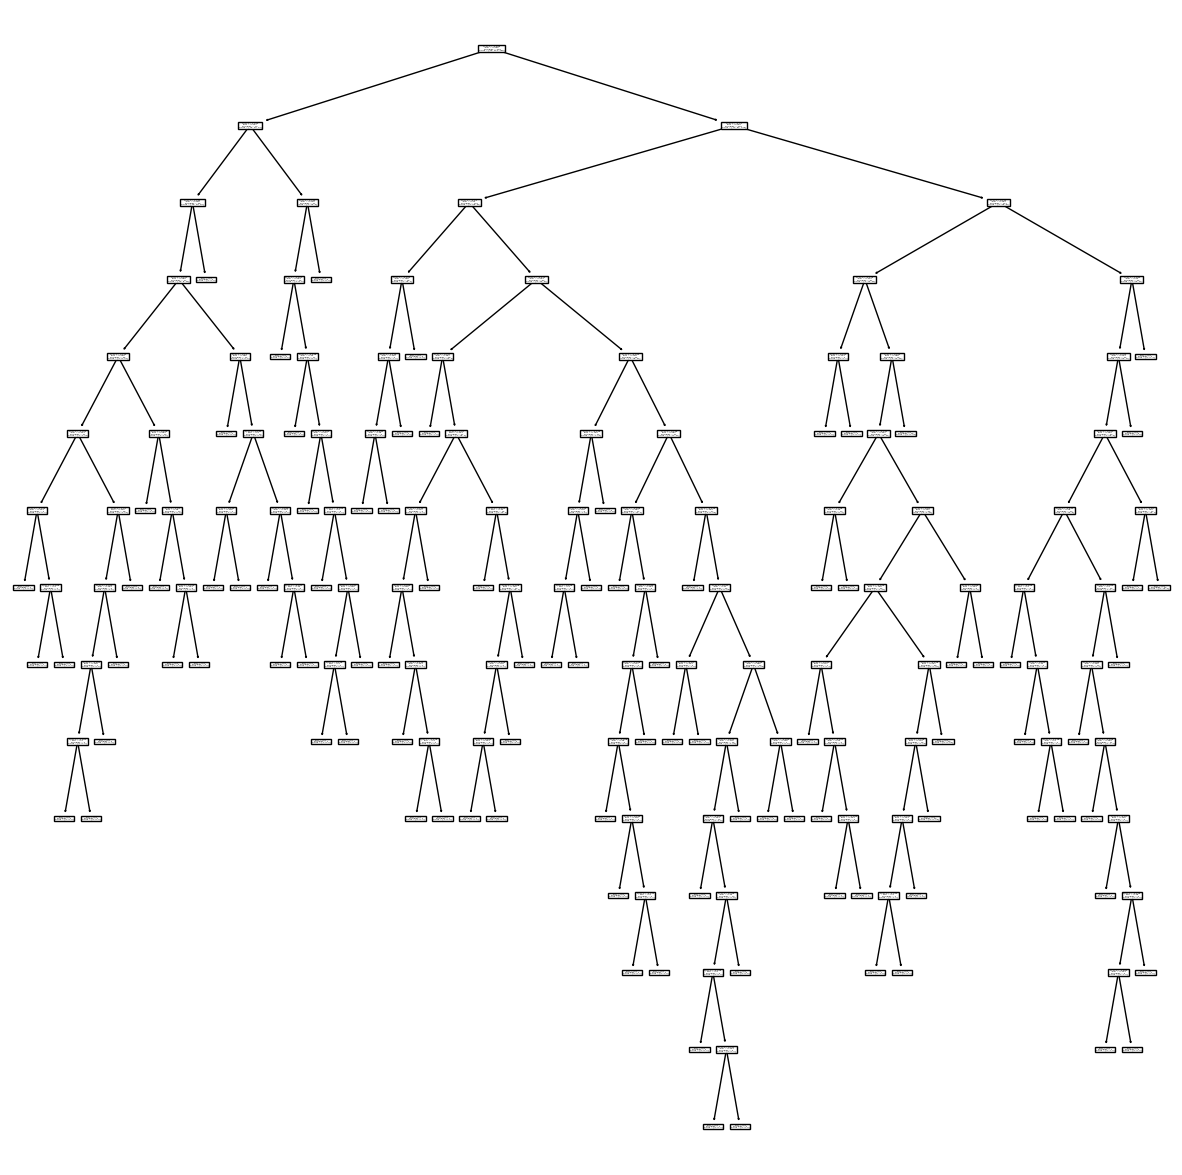

In [165]:
# check accuracy of model
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, yhatTree))
Tree_Accuracy = metrics.accuracy_score(Y_test, yhatTree)
# visualize the tree
plt.figure(figsize=(15, 15)) 
tree.plot_tree(Treee)
plt.show()

### Logistic Regression
Logisitic regression provides the probability that the subject will belong to one of the groups

In [199]:
# create a logistic regression object
# create a grid search cv object with cv =10
# fit the object to find the parameters from the dictionary parameters
parameters ={'C':[0.001,0.01,0.1,1,10],
             'penalty':['l2'],
             'solver':['lbfgs', 'liblinear'],
             'multi_class':['ovr']}
lr=LogisticRegression()
grid_search = GridSearchCV(lr, parameters, cv=10)
logreg_cv = grid_search.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6716091954022988


In [200]:
# predict using our test set
yhatLR = logreg_cv.predict(X_test)
yhatLR

array(['Demented', 'Nondemented', 'Demented', 'Nondemented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented',
       'Nondemented', 'Demented', 'Demented', 'Nondemented',
       'Nondemented', 'Nondemented', 'Demented', 'Demented',
       'Nondemented', 'Demented', 'Nondemented', 'Demented',
       'Nondemented', 'Nondemented', 'Demented', 'Demented',
       'Nondemented', 'Demented', 'Demented', 'Nondemented', 'Demented',
       'Demented', 'Demented', 'Nondemented', 'Nondemented', 'Demented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Demented',
       'Nondemented', 'Demented', 'Nondemented', 'Nondemented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Demented',
       'Demented', 'Nondemented', 'Nondemented', 'Demented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Demented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented',
       'Demented', 'Demented', 

In [201]:
yhat_prob = logreg_cv.predict_proba(X_test)
yhat_prob

array([[0.08907343, 0.81792895, 0.09299762],
       [0.20663978, 0.30557856, 0.48778166],
       [0.05774063, 0.47570489, 0.46655448],
       [0.16536791, 0.1570487 , 0.67758339],
       [0.05545867, 0.36665581, 0.57788551],
       [0.02855787, 0.27468856, 0.69675357],
       [0.10991535, 0.16472314, 0.72536151],
       [0.07558651, 0.2821107 , 0.64230279],
       [0.0946004 , 0.36127499, 0.54412461],
       [0.02134628, 0.49109975, 0.48755397],
       [0.03419099, 0.75973926, 0.20606975],
       [0.05873209, 0.2876023 , 0.65366561],
       [0.3516744 , 0.0768977 , 0.5714279 ],
       [0.0634435 , 0.05717532, 0.87938118],
       [0.13274216, 0.47055793, 0.39669991],
       [0.0874464 , 0.68719477, 0.22535883],
       [0.0501202 , 0.46747751, 0.48240229],
       [0.00806006, 0.8487462 , 0.14319374],
       [0.02194978, 0.13589161, 0.84215861],
       [0.21043951, 0.60333514, 0.18622534],
       [0.04197808, 0.45192704, 0.50609488],
       [0.01396248, 0.36791166, 0.61812586],
       [0.

In [202]:
# calculate the accuracy using score
LR_Accuracy = metrics.accuracy_score(Y_test, yhatLR)

### Support Vector Machine  
Classifies cases by finding a seperator

In [170]:
# create a SVM object 
# create a grid search cv object with cv=10
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(1, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(decision_function_shape='ovr')
grid_search = GridSearchCV(svm, parameters, cv=5)
svm_cv = grid_search.fit(X_train, Y_train)

In [171]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy : 0.7114689265536723


In [172]:
# model with SVM, use the best parameters found above
classifier = OneVsRestClassifier(SVC(C=31.62277,kernel='rbf', gamma= 0.0316))
classifier.fit(X_train,Y_train)

OneVsRestClassifier(estimator=SVC(C=31.62277, gamma=0.0316))

In [173]:
# use the model to predict values
yhatSVM = classifier.predict(X_test)
print(yhatSVM[0:70])
print (Y_test [0:70])

['Demented' 'Demented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Demented' 'Nondemented' 'Converted' 'Nondemented' 'Demented'
 'Nondemented' 'Nondemented' 'Demented' 'Nondemented' 'Demented'
 'Nondemented' 'Nondemented' 'Demented' 'Demented' 'Nondemented'
 'Demented' 'Demented' 'Nondemented' 'Demented' 'Converted' 'Demented'
 'Nondemented' 'Nondemented' 'Demented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Demented' 'Converted' 'Demented' 'Nondemented'
 'Nondemented' 'Nondemented' 'Nondemented' 'Converted' 'Demented'
 'Demented' 'Nondemented' 'Nondemented' 'Demented' 'Nondemented'
 'Demented' 'Demented' 'Nondemented' 'Demented' 'Nondemented'
 'Nondemented' 'Demented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Demented' 'Demented' 'Nondemented' 'Demented' 'Demented'
 'Nondemented' 'Nondemented' 'Nondemented']
['Demented' 'Converted' 'Demented' 'Nondemented' 'Converted' 'Demented'
 'Demented' 'Nondem

In [174]:
SVM_Accuracy = metrics.accuracy_score(Y_test, yhatSVM)
SVM_Accuracy

0.6133333333333333

### Compare the models

In [220]:
print("KNN Accuracy: ", KNN_Accuracy)
print("Decision Tree Accuracy: ", Tree_Accuracy)
print("Logistic Regression Accuracy: ", LR_Accuracy)
print("SVM Accuracy: ", SVM_Accuracy)

KNN Accuracy:  0.7066666666666667
Decision Tree Accuracy:  0.6533333333333333
Logistic Regression Accuracy:  0.6666666666666666
SVM Accuracy:  0.6133333333333333


Conclusion: The K Nearest Neighbor model had the highest accuracy, but all four models were relatively similar.  
Preform more metrics to further compare the models.  

Methods of comparison:  
- Jaccard Index
- F1 Score
- Confusion Matrix
- Log Loss for Logistic Regression

In [221]:
# evaluate KNN with f1 score
KNN_f1_score = f1_score(Y_test,yhatKNN, average = 'weighted')
# evaluate KNN with Jaccard Score
KNN_jaccard_score = jaccard_score(Y_test, yhatKNN, average=None)

# evaluate with f1 score
Tree_f1_score = f1_score(Y_test,yhatTree, average = 'weighted')
# evaluate with Jaccard Score
Tree_jaccard_score = jaccard_score(Y_test, yhatTree,average=None)

# evaluate with f1 score
SVM_f1_score = f1_score(Y_test,yhatSVM, average = 'weighted')
# evaluate with Jaccard Score
SVM_jaccard_score = jaccard_score(Y_test, yhatSVM,average=None)

# evaluate with log loss
LR_log_loss=log_loss(Y_test, yhat_prob)
# evaluate with f1 score
Log_f1_score = f1_score(Y_test,yhatLR, average = 'weighted')
# evaluate with Jaccard Score
Log_jaccard_score = jaccard_score(Y_test,yhatLR,average=None)

# make a pretty table of the results
Results = {'Algorithm':['KNN','Decision Tree','SVM','Logistic Regression'],
           'Jaccard':[KNN_jaccard_score,Tree_jaccard_score,SVM_jaccard_score,Log_jaccard_score],
           'F1-score':[KNN_f1_score,Tree_f1_score,SVM_f1_score,Log_f1_score],
           'LogLoss':['NA','NA','NA',LR_log_loss],
           'Accuracy Score':[KNN_Accuracy,Tree_Accuracy,SVM_Accuracy,LR_Accuracy]}
Resultsdf = pd.DataFrame(data=Results)
Resultsdf

,Algorithm,Jaccard,F1-score,LogLoss,Accuracy Score
0,KNN,"[0.2857142857142857, 0.6410256410256411, 0.545...",0.699695,NA,0.706667
1,Decision Tree,"[0.21428571428571427, 0.525, 0.5319148936170213]",0.641831,NA,0.653333
2,SVM,"[0.0, 0.5526315789473685, 0.49019607843137253]",0.584431,NA,0.613333
3,Logistic Regression,"[0.0, 0.5945945945945946, 0.5384615384615384]",0.616859,0.861453,0.666667


In [222]:
# define function to plot the confusion matrix
def plot_confusion_matrix(y,y_predict,model):
    "this function plots the confusion matrix"
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix {model}'); 
    ax.xaxis.set_ticklabels(['Converted', 'Demented','Nondemented']); ax.yaxis.set_ticklabels(['Converted', 'Demented','Nondemented'])

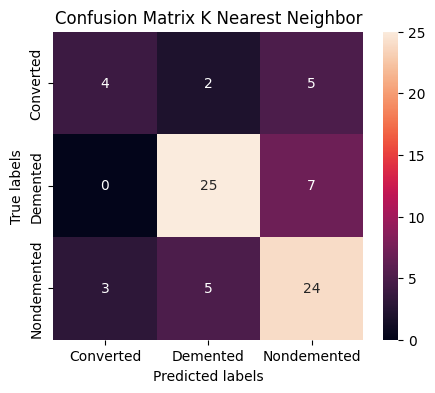

In [223]:
# plot confusion matrix for KNN
plot_confusion_matrix(Y_test,yhatKNN,"K Nearest Neighbor")

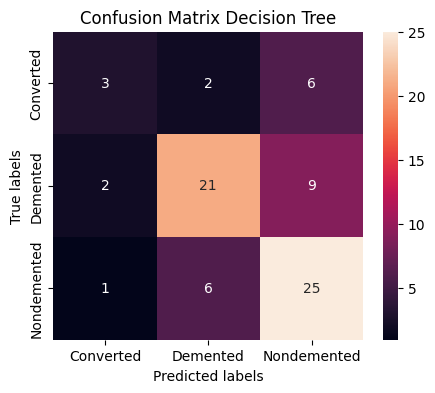

In [224]:
# plot confusion matrix for decision tree
plot_confusion_matrix(Y_test,yhatTree,"Decision Tree")

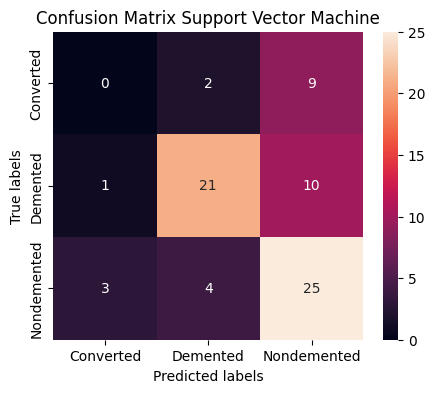

In [225]:
# plot confusion matrix for SVM
plot_confusion_matrix(Y_test,yhatSVM,"Support Vector Machine")

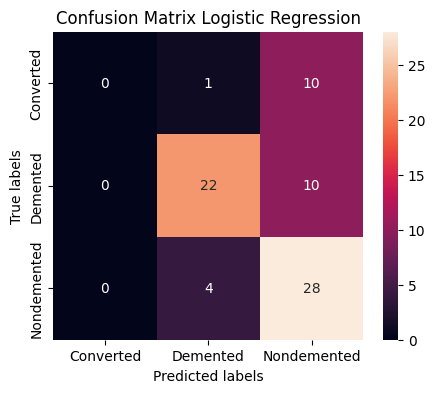

In [226]:
# plot confusion matrix for LR
plot_confusion_matrix(Y_test,yhatLR,"Logistic Regression")

### K Fold Cross Validation
The above results demonstrate that our best model K Nearest Neighbors.  
Lets perform K fold cross validation to ensure the model isnt being overfit to the data

In [230]:
k = 5
kf = KFold(n_splits=k, random_state=None)
# get average accuracy for KNN
resultKNN = cross_val_score(knn_cv, X, y, cv = kf)
print("Avg accuracy KNN: {}".format(resultKNN.mean()))
# repeat for SVM
resultSVM = cross_val_score(classifier, X, y, cv = kf)
print("Avg accuracy KNN: {}".format(resultSVM.mean()))
# repeat for LR
resultLR = cross_val_score(logreg_cv, X, y, cv = kf)
print("Avg accuracy KNN: {}".format(resultLR.mean()))
# repeat for tree
resultTree = cross_val_score(Treee, X, y, cv = kf)
print("Avg accuracy KNN: {}".format(resultTree.mean()))

Avg accuracy KNN: 0.5414414414414415
Avg accuracy KNN: 0.5815855855855856
Avg accuracy KNN: 0.6054414414414415
Avg accuracy KNN: 0.5015135135135135


### Conclusion:
The models all have their strengths and weaknesses.  
- Preliminery analysis showed that K nearest neighbor had the highest accuracy, however K fold cross validation revealed that they be due to overfitting of the model
- The model with the next highest accuracy was logistic regression, logistic regression also had the highest k fold cross validation score. However, the confusion matrix revealed that logistic regression did not predict any subject the be in the converted group.  
- Support Vector Machine seems to be the happy medium, in that it had an accuracy and k fold cross validation score similar to logistic regression while also considering the converted group. 
- Decision Tree preformed the worst in all aspects.  

Therefore, Support Vector Machine is decided to be the best model to move forward with.